## Jaishree Joshita

### Task 1 - Prediction using Supervised ML (Level - Beginner)

We have data(can be found at http://bit.ly/w-data) on the no. of study hours a student gives on daily basis to score in the examination. On the basis of that, form a regression model that helps in predicting the score if a student studies for 9.25 hrs/day using Python.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading the data from the above provided link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print ("data imported succesfully")

data imported succesfully


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

### Visualizing the data
plotting the data grapghically to drive relationship between the two variables.

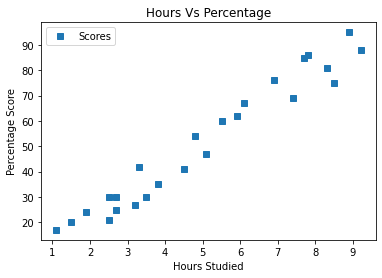

In [18]:
## Plotting the dictribution of scores

data.plot(x = 'Hours', y = 'Scores', style = 's')
plt.title ('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data

In [22]:
# dividing the data into "attributes" (inputs) and "labels" (outputs)
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [23]:
# Splitting this data into a training and test set by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                            test_size = 0.2, random_state = 0)


In [24]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",x_train.shape)
print("Shape of y_test",x_test.shape)

Shape of x_train (20, 1)
Shape of x_test (5, 1)
Shape of y_train (20, 1)
Shape of y_test (5, 1)


In [25]:
## After splitting, we have to train our algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete!!!")

Training Complete!!!


### Plotting the Regression Line

In [26]:
regressor.coef_

array([9.91065648])

In [27]:
regressor.intercept_

2.018160041434683

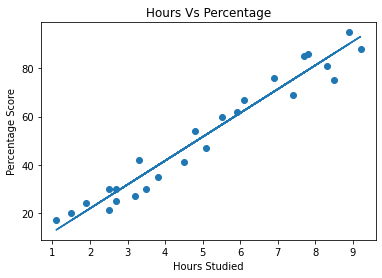

In [28]:
line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data -----
plt.scatter(x,y)
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x, line)
plt.show()

### Predictions 

In [30]:
print(x_test)   #testing data - in Hours
y_predict = regressor.predict(x_test)    #Predicting the Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
# Comparing the Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
# Predicting the percentage score value by own data
Hours = [9.25]
own_predict = regressor.predict([Hours])
print("No. of Hours Studied = {}".format(Hours))
print("Predicted Percentage Score = {}".format(own_predict[0]))

No. of Hours Studied = [9.25]
Predicted Percentage Score = 93.69173248737538


### Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have evaluated model by using the mean absolute error, mean squared error and root mean squared error respectively.

In [35]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
